<img src="Techzooka.png">

## Hacker Factory Cyber Hackathon Solution 
### by Team Jugaad (Abhiraj Singh Rajput, Deepanshu Gupta, Manuj Mehrotra)

We are a team of members, that are NOT moved by the buzzwords like Machine Learning, Data Science, AI etc. However we are a team of people who get adrenaline rush for seeking the solution to a problem. And the approach to solve the problem is never a constraint for us. Keeping our heads down we tried out bit to solve the problem of <i><b>“Preventive analytics with AI – How to use AI to predict probability of occurrence of a crime.”</b></i>
Formally our team members: -
<ul>
    <i><b>
<li>Abhiraj Singh Rajput(BI Engineer, Emp ID -1052530)</li>
<li>Deepanshu Gupta(Performance Test Engineer, Emp ID - 1048606)</li>
<li>Manuj Mehrotra(Analyst-Data Science, Emp ID - 1061322)</li>
     </b></i>
</ul>

### Preventive analytics with AI – How to use AI to predict probability of occurrence of a crime

<ul>
<li><b>Context</b>:- We tried to create a classification ML model to analyze the data points and using that we tried to Forecast the occurrence of the Malware attack. For the study we have taken two separate datasets i.e. bifurcated datasets, on the basis of Static and Dynamic features (Sources: Ref[3]).</li><br>


<li><b>Scope of the solution covered</b> :- Since the Model that we have created considers nearly 350 Features (i.e. 331 statics features and 13 dynamic Features) for predicting the attack, so the model is very Robust and is scalable very easily. The objective behind building this predictive model was to forecast the attack of a malicious app by capturing these features and hence preventing them from attacking the device.</li>
</ul>


## Soultion Archicture 

<img src="Solution Architecture.png">

# Additional Information – How can it enhance further

<ul>
<li>The data set that we used for Static Analysis has just 398 data points that is comparatively very less to generalize a statistical model (to population).</li>

<li>We haven’t tuned the all the hyper parameter of ML models, however we have considered the important hyper parameters while model building ex: - tuning K in K-NN.</li>

<li>We have analyses the Static and Dynamic Analysis separately. However a more robust model will be that, analyzes both the features together, provided we have sufficient number of data points.</li>

<li>Stacking or ensembling of the ML models from both the data sets could be done to make the model more Robust, provided we capture both the static and dynamic feature of the application.</li>

<li>Dynamic features likes duracion , avg_local_pkt_rate  and  avg_remote_pkt_rate  were not captured which would have degraded the model quality by some amount.</li>
</ul>

# Proof Of Concept

### Static Analysis

Includes analysing the application that we want to analyse without executing it, like the study of resources, app permission etc.

In [1]:
import pandas as pd
df = pd.read_csv("train.csv", sep=";")

In [2]:
df.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.columns

Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

In [4]:
df.shape

(398, 331)

### Let's get the top 10 of permissions that are used for our malware samples

#### Malicious

In [5]:
series = pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]
series

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

In [6]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

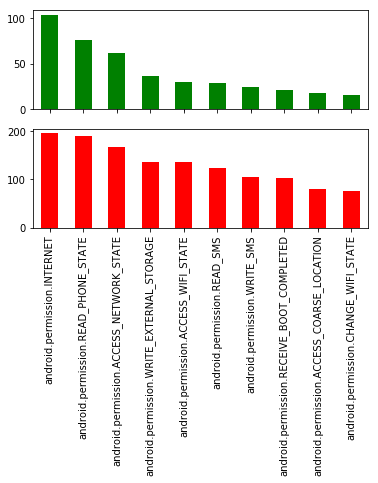

In [8]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0], color="green")
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

## Now will try to predict with the exsisting data set, i.e. model creation
### Machine Learning Models

In [9]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
#import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
y = df["type"]
X = df.drop("type", axis=1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)

In [12]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8181818181818182
             precision    recall  f1-score   support

          0       0.95      0.75      0.84        84
          1       0.68      0.94      0.79        48

avg / total       0.86      0.82      0.82       132



In [13]:

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.9015151515151515
             precision    recall  f1-score   support

          0       0.89      0.91      0.90        65
          1       0.91      0.90      0.90        67

avg / total       0.90      0.90      0.90       132


kneighbors 6
0.8939393939393939
             precision    recall  f1-score   support

          0       0.94      0.86      0.90        72
          1       0.85      0.93      0.89        60

avg / total       0.90      0.89      0.89       132


kneighbors 9
0.8863636363636364
             precision    recall  f1-score   support

          0       0.92      0.86      0.89        71
          1       0.85      0.92      0.88        61

avg / total       0.89      0.89      0.89       132


kneighbors 12
0.8712121212121212
             precision    recall  f1-score   support

          0       0.92      0.84      0.88        73
          1       0.82      0.92      0.86        59

avg / total       0.88      0.87      0.87       132




In [14]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8560606060606061
             precision    recall  f1-score   support

          0       0.80      0.90      0.85        59
          1       0.91      0.82      0.86        73

avg / total       0.86      0.86      0.86       132



### Dynamic Analysis

For this approach, we used a set of pcap files from the DroidCollector project integrated by 4705 benign and 7846 malicious applications. All of the files were processed by our feature extractor script (a result from [4]), the idea of this analysis is to answer the next question, according to the static analysis previously seen a lot of applications use a network connection, in other words, they are trying to communicate or transmit information, so.. is it possible to distinguish between malware and benign application using network traffic?

In [15]:
import pandas as pd
data = pd.read_csv("android_traffic.csv", sep=";")
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [16]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [17]:
data.shape

(7845, 17)

In [18]:
data.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [19]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [20]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()

In [21]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


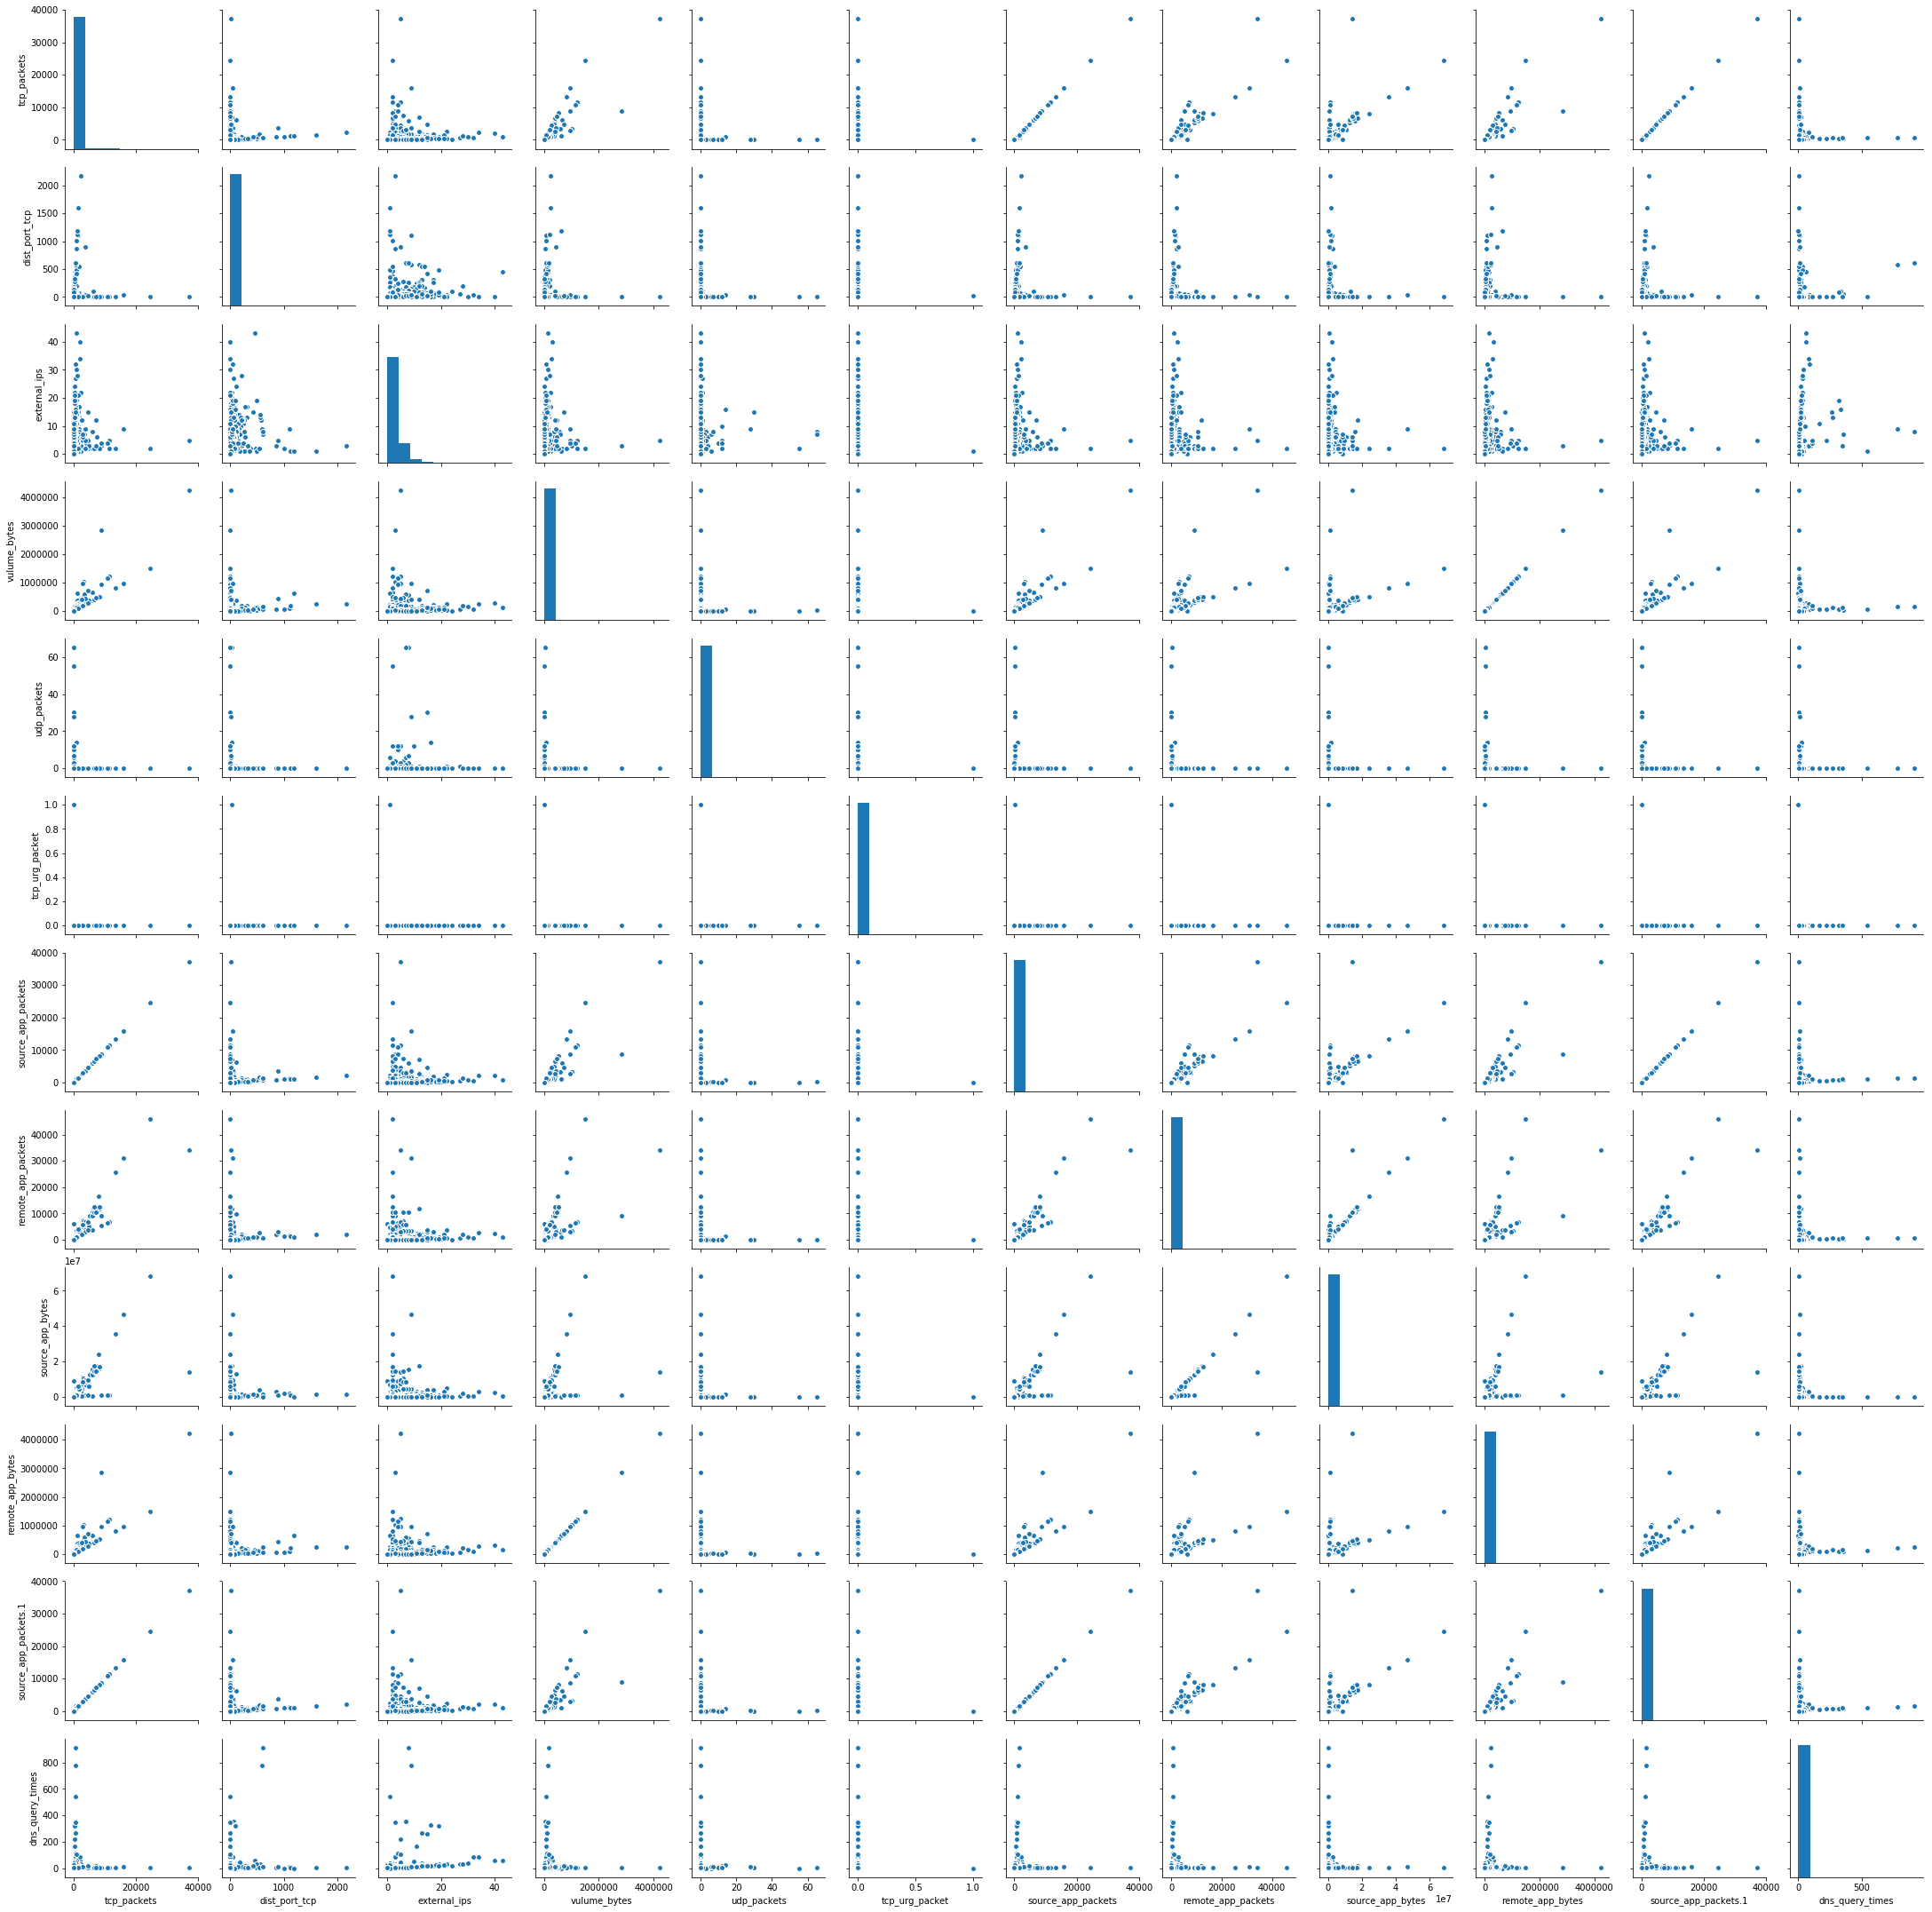

In [22]:
sns.pairplot(data)

In [23]:
data.loc[data.tcp_urg_packet > 0].shape[0]

2

In [24]:
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape

(7845, 13)

In [25]:
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()

In [26]:
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [27]:
data=data.drop('source_app_packets.1',axis=1).copy()

In [28]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], data.type.astype("str"), test_size=0.25, random_state=45)

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))

naive_bayes
0.44688457609805926
             precision    recall  f1-score   support

     benign       0.81      0.12      0.20      1190
  malicious       0.41      0.96      0.58       768

avg / total       0.66      0.45      0.35      1958

cohen kappa score
0.06082933470572538


In [31]:
for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("cohen kappa score")
    print(cohen_kappa_score(y_test, pred))
    print("")

kneighbors 3
0.8861082737487231
             precision    recall  f1-score   support

     benign       0.90      0.91      0.91      1173
  malicious       0.87      0.85      0.86       785

avg / total       0.89      0.89      0.89      1958

cohen kappa score
0.7620541314671169

kneighbors 6
0.8784473953013279
             precision    recall  f1-score   support

     benign       0.92      0.88      0.90      1240
  malicious       0.81      0.87      0.84       718

avg / total       0.88      0.88      0.88      1958

cohen kappa score
0.7420746759356631

kneighbors 9
0.8707865168539326
             precision    recall  f1-score   support

     benign       0.89      0.90      0.89      1175
  malicious       0.85      0.83      0.84       783

avg / total       0.87      0.87      0.87      1958

cohen kappa score
0.729919255030886

kneighbors 12
0.8615934627170582
             precision    recall  f1-score   support

     benign       0.88      0.89      0.89      1185
  mali

In [32]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)
0.9172625127681308
             precision    recall  f1-score   support

     benign       0.93      0.94      0.93      1190
  malicious       0.90      0.88      0.89       768

avg / total       0.92      0.92      0.92      1958

cohen kappa score
0.8258206083396299
[[1117   73]
 [  89  679]]


In [33]:
from lightgbm import LGBMClassifier

In [34]:
rdF=LGBMClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=50,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=250, n_jobs=-1, num_leaves=31, objective=None,
        random_state=45, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.8932584269662921
             precision    recall  f1-score   support

     benign       0.91      0.91      0.91      1190
  malicious       0.86      0.87      0.86       768

avg / total       0.89      0.89      0.89      1958

cohen kappa score
0.7763753108008415
[[1083  107]
 [ 102  666]]


C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
import pandas as pd
feature_importances = pd.DataFrame(rdF.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [36]:
feature_importances

,importance
source_app_bytes,1648
remote_app_bytes,1107
remote_app_packets,1076
vulume_bytes,891
tcp_packets,764
source_app_packets,641
dns_query_times,469
dist_port_tcp,466
external_ips,396
udp_packets,42


In [37]:
x= feature_importances.index

In [38]:
y=feature_importances["importance"]

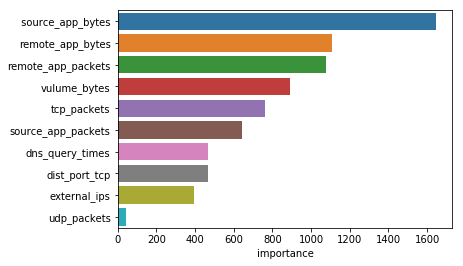

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x=y,y=x)

# Refrence

<ul>

<li>Christian Camilo Urcuqui López(https://github.com/urcuqui/)</li>
<li>Android Genome Project (MalGenome)</li>
<li>Data Set Source (https://www.kaggle.com/xwolf12/datasetandroidpermissions , https://www.kaggle.com/xwolf12/network-traffic-android-malware)</li>
<li> [1] López, U., Camilo, C., García Peña, M., Osorio Quintero, J. L., & Navarro Cadavid, A. (2018). Ciberseguridad: un enfoque desde la ciencia de datos-Primera edición.</li>
<li>[2] Navarro Cadavid, A., Londoño, S., Urcuqui López, C. C., & Gomez, J. (2014, June). Análisis y caracterización de frameworks para detección de aplicaciones maliciosas en Android. In Conference: XIV Jornada Internacional de Seguridad Informática ACIS-2014 (Vol. 14). ResearchGate.</li>
<li>[3] Urcuqui-López, C., & Cadavid, A. N. (2016). Framework for malware analysis in Android.</li>
<li>[4] Urcuqui, C., Navarro, A., Osorio, J., & Garcıa, M. (2017). Machine Learning Classifiers to Detect Malicious Websites. CEUR Workshop Proceedings. Vol 1950, 14-17.</li>
<li>[5] López, C. C. U., Villarreal, J. S. D., Belalcazar, A. F. P., Cadavid, A. N., & Cely, J. G. D. (2018, May). Features to Detect Android Malware. In 2018 IEEE Colombian Conference on Communications and Computing (COLCOM) (pp. 1-6). IEEE</li>

</ul>